In [1]:
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import pandas as pd

In [3]:
#data = fits.open('N3115_phot_colorcorr_extcorr_CaT.fits')
data = pd.read_csv('n4473_phot_combined.csv')

In [37]:
np.max(data[1].data['fwhm_world'][spec_gc])

2.3221893599999999

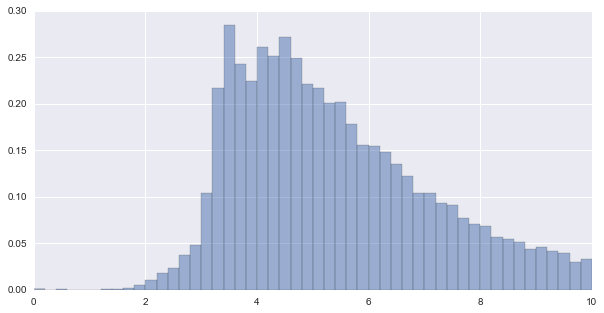

In [7]:
fig,ax = plt.subplots(figsize=(10,5))
#foo = ax.hist(data[1].data['fwhm_world'],bins=50,range=(0,3),normed=True)
foo = ax.hist(data['i_fwhm'],bins=50,range=(0,10), normed=True,alpha=0.5)
#foo = ax.hist(data[1].data['fwhm_world'][spec_gc],bins=50,range=(0,1), normed=True,alpha=0.5)

(0.2, 10)

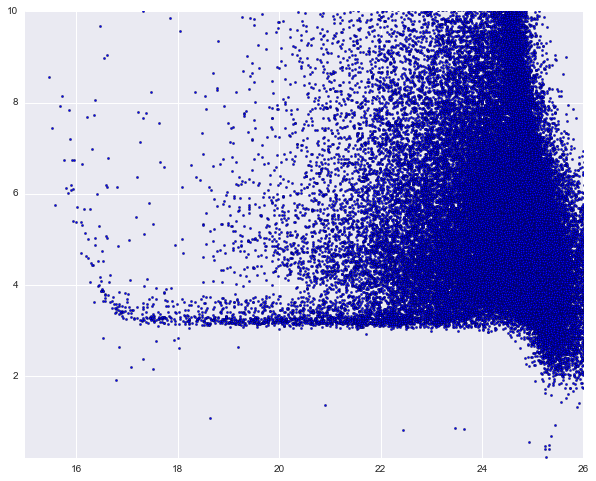

In [11]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(data['i_mag'],data['i_fwhm'],s=5)
ax.set_xlim(15,26)
ax.set_ylim(0.2,10)

(-0.5, 1)

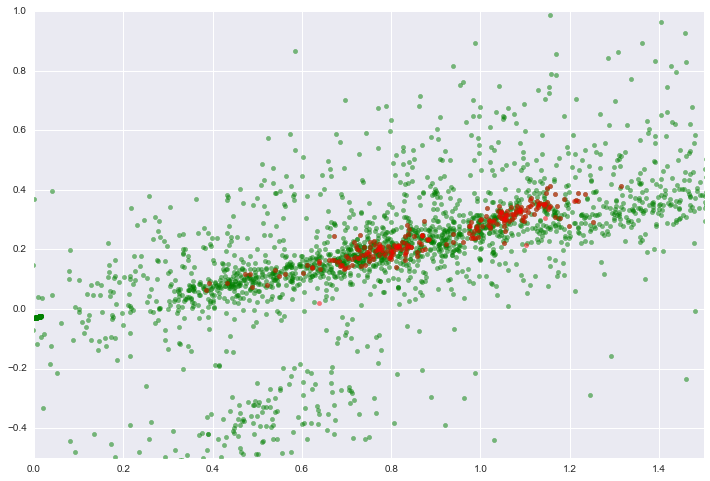

In [87]:
fig,ax = plt.subplots(figsize=(12,8))
#ax.scatter(data[1].data['gmag'] - data[1].data['imag'],data[1].data['rmag'] - data[1].data['imag'],s=0.5)
ax.scatter(data[1].data['gmag'][pt_sources] - data[1].data['imag'][pt_sources],\
           data[1].data['rmag'][pt_sources] - data[1].data['imag'][pt_sources],s=20,color='green',alpha=0.5)
#ax.scatter(data[1].data['gmag'][phot_gc] - data[1].data['imag'][phot_gc],\
#           data[1].data['rmag'][phot_gc] - data[1].data['imag'][phot_gc],s=20,color='blue',alpha=0.5)
ax.scatter(data[1].data['gmag'][spec_gc] - data[1].data['imag'][spec_gc],\
           data[1].data['rmag'][spec_gc] - data[1].data['imag'][spec_gc],s=20,color='red',alpha=0.5)

#ax.scatter(data[1].data['imag'][phot_gc],data[1].data['fwhm_world'][phot_gc],s=20,color='blue')
#ax.scatter(data[1].data['imag'][spec_gc],data[1].data['fwhm_world'][spec_gc],s=20,color='red')
ax.set_xlim(0.0,1.5)
ax.set_ylim(-0.5,1)

In [81]:
#Now that catalogs are joined, put everything in a pandas data frame. Note that if I had written
#my catalog code a year later, it would be written with the intention of doing this from the beginning...
catalog_dict = {}

#get the ra and dec from the coordinate object and place them in a pandas series
catalog_dict['ra'] = pd.Series(data[1].data['ra'][pt_sources])
catalog_dict['dec'] = pd.Series(data[1].data['dec'][pt_sources])

#put the mags in pandas series:
catalog_dict['g_mag'] = pd.Series(data[1].data['gmag'][pt_sources])
catalog_dict['r_mag'] = pd.Series(data[1].data['rmag'][pt_sources])
catalog_dict['i_mag'] = pd.Series(data[1].data['imag'][pt_sources])

#same for the merrs:
catalog_dict['g_merr'] = pd.Series(data[1].data['errgmag'][pt_sources])
catalog_dict['r_merr'] = pd.Series(data[1].data['errrmag'][pt_sources])
catalog_dict['i_merr'] = pd.Series(data[1].data['errimag'][pt_sources])

'''
#same for the fwhm:
catalog_dict['g_fwhm'] = pd.Series(se_g.fwhm['g'])
catalog_dict['r_fwhm'] = pd.Series(se_g.fwhm['r'])
catalog_dict['i_fwhm'] = pd.Series(se_g.fwhm['i'])

#same for the ellipticity:
catalog_dict['g_ellip'] = pd.Series(se_g.ellipticity['g'])
catalog_dict['r_ellip'] = pd.Series(se_g.ellipticity['r'])
catalog_dict['i_ellip'] = pd.Series(se_g.ellipticity['i'])

#same for the flags:
catalog_dict['g_flags'] = pd.Series(se_g.flags['g'])
catalog_dict['r_flags'] = pd.Series(se_g.flags['r'])
catalog_dict['i_flags'] = pd.Series(se_g.flags['i'])
'''

"\n#same for the fwhm:\ncatalog_dict['g_fwhm'] = pd.Series(se_g.fwhm['g'])\ncatalog_dict['r_fwhm'] = pd.Series(se_g.fwhm['r'])\ncatalog_dict['i_fwhm'] = pd.Series(se_g.fwhm['i'])\n\n#same for the ellipticity:\ncatalog_dict['g_ellip'] = pd.Series(se_g.ellipticity['g'])\ncatalog_dict['r_ellip'] = pd.Series(se_g.ellipticity['r'])\ncatalog_dict['i_ellip'] = pd.Series(se_g.ellipticity['i'])\n\n#same for the flags:\ncatalog_dict['g_flags'] = pd.Series(se_g.flags['g'])\ncatalog_dict['r_flags'] = pd.Series(se_g.flags['r'])\ncatalog_dict['i_flags'] = pd.Series(se_g.flags['i'])\n"

In [83]:
n3115_pt_sources = pd.DataFrame(catalog_dict)

In [85]:
n3115_pt_sources.to_csv('n3115_pt_sources_jacob.csv')